### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [34]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data, preprocess_datamnist
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix

Cargamos los datos de iris y preprocesamos los datos

In [35]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [37]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [38]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.4
epoch   0 - Loss 0.17662, Accuracy 0.70833
epoch  10 - Loss 0.19827, Accuracy 0.75000
epoch  20 - Loss 0.14977, Accuracy 0.75000
epoch  30 - Loss 0.10520, Accuracy 0.75000
epoch  40 - Loss 0.07217, Accuracy 0.75000
epoch  50 - Loss 0.04778, Accuracy 0.79167
epoch  60 - Loss 0.03215, Accuracy 0.79167
epoch  70 - Loss 0.02399, Accuracy 0.79167
epoch  80 - Loss 0.01898, Accuracy 0.79167
epoch  90 - Loss 0.01501, Accuracy 0.83333
epoch 100 - Loss 0.01205, Accuracy 0.83333
epoch 110 - Loss 0.00947, Accuracy 0.83333
epoch 120 - Loss 0.00726, Accuracy 0.83333
epoch 130 - Loss 0.00556, Accuracy 0.83333
epoch 140 - Loss 0.00410, Accuracy 0.83333
epoch 150 - Loss 0.00271, Accuracy 0.83333
epoch 160 - Loss 0.00179, Accuracy 0.83333
epoch 170 - Loss 0.00122, Accuracy 0.83333
epoch 180 - Loss 0.00085, Accuracy 0.83333
epoch 190 - Loss 0.00060, Accuracy 0.83333
epoch 200 - Loss 0.00043, Accuracy 0.83333
epoch 210 - Loss 0.00031, Accuracy 0.83333
epoch 220 - Loss 0.0002

Hacemos la matriz de confusión

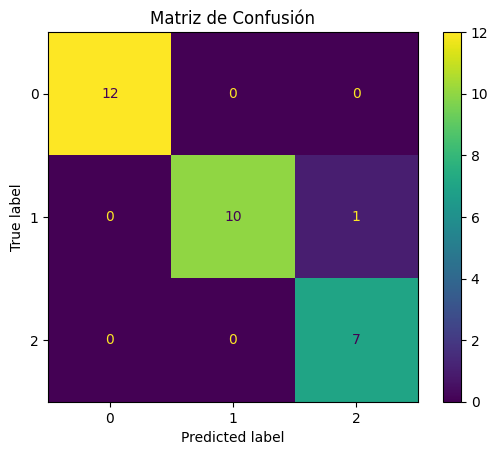

In [39]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Ahora realizaremos la misma prueba pero añadiendo más capas y cambiando la función de activación

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(10, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [42]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.26666666666666666
epoch   0 - Loss 0.45672, Accuracy 0.62500
epoch  10 - Loss 0.52078, Accuracy 0.83333
epoch  20 - Loss 0.40148, Accuracy 0.83333
epoch  30 - Loss 0.32554, Accuracy 0.87500
epoch  40 - Loss 0.27382, Accuracy 0.87500
epoch  50 - Loss 0.23566, Accuracy 0.87500
epoch  60 - Loss 0.20466, Accuracy 0.87500
epoch  70 - Loss 0.17766, Accuracy 0.87500
epoch  80 - Loss 0.15368, Accuracy 0.95833
epoch  90 - Loss 0.13263, Accuracy 0.95833
epoch 100 - Loss 0.11454, Accuracy 0.95833
epoch 110 - Loss 0.09932, Accuracy 0.95833
epoch 120 - Loss 0.08669, Accuracy 0.95833
epoch 130 - Loss 0.07627, Accuracy 0.95833
epoch 140 - Loss 0.06767, Accuracy 0.95833
epoch 150 - Loss 0.06053, Accuracy 0.95833
epoch 160 - Loss 0.05457, Accuracy 0.95833
epoch 170 - Loss 0.04955, Accuracy 0.95833
epoch 180 - Loss 0.04531, Accuracy 0.95833
epoch 190 - Loss 0.04169, Accuracy 0.95833
epoch 200 - Loss 0.03859, Accuracy 0.95833
epoch 210 - Loss 0.03591, Accuracy 0.95833
epoch 2

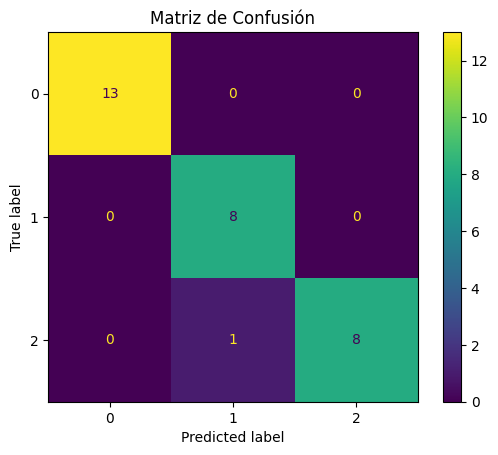

In [43]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=0.96$$

$$ \text{Accuracy}_{2domodelo}=0.96$$


Por lo que podemos llegar a la conclusión de que la neurona funciona bien aún poniendo más capas o cambiando las funciones de activación

### Tests de entrenamiento para el conjunto de datos MNIST

Cargamos los archivos del conjunto de datos MNIST

In [44]:
from data.load_data import load_mnist_data
X, y = load_mnist_data()    
X, y = preprocess_datamnist(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de entrenamiento y prueba

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal

In [46]:
nn = NeuralNetwork()
nn.add_layer(Layer(784, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [49]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=50, learning_rate=0.0001)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.09714285714285714
epoch   0 - Loss 2.23397, Accuracy 0.09777
epoch  10 - Loss 2.33570, Accuracy 0.11179
epoch  20 - Loss 2.33695, Accuracy 0.11179
epoch  30 - Loss 2.33697, Accuracy 0.11179
epoch  40 - Loss 2.33697, Accuracy 0.11179
accuracy after training:  0.11142857142857143


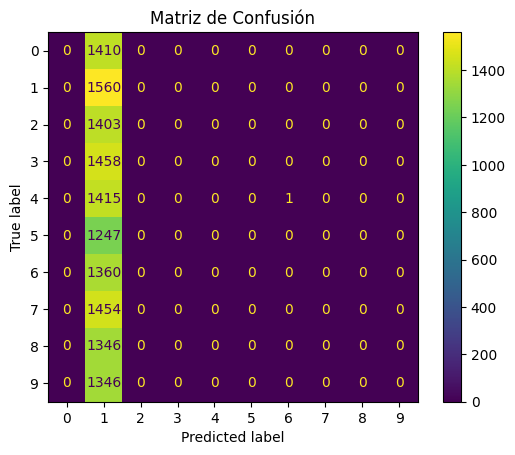

In [50]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Nos damos cuenta de que el modelo no mejora y se queda estancado en el mismo accuracy, aún poniendo un learning rate bajo, por lo tanto lo más probable es que haya un problema de desvanecimiento del gradiente, debido al uso de un gran conjunto de datos, por lo que optamos por usar otro conjunto de datos más pequeño.

### Test de entrenamiento del conjunto de datos DIGITS

Cargamos y preprocesamos los datos del conjunto de datos DIGITS

In [51]:
from data.load_data import load_digits_data
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y entrenamos

In [53]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [54]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.1527777777777778
epoch   0 - Loss 0.33483, Accuracy 0.33333
epoch  10 - Loss 0.12979, Accuracy 0.78125
epoch  20 - Loss 0.07697, Accuracy 0.83333
epoch  30 - Loss 0.05834, Accuracy 0.85069
epoch  40 - Loss 0.04914, Accuracy 0.87500
epoch  50 - Loss 0.04593, Accuracy 0.87500
epoch  60 - Loss 0.03506, Accuracy 0.86458
epoch  70 - Loss 0.03100, Accuracy 0.86806
epoch  80 - Loss 0.02868, Accuracy 0.87153
epoch  90 - Loss 0.02699, Accuracy 0.87153
epoch 100 - Loss 0.02665, Accuracy 0.87847
epoch 110 - Loss 0.01769, Accuracy 0.87500
epoch 120 - Loss 0.01388, Accuracy 0.86806
epoch 130 - Loss 0.01214, Accuracy 0.87500
epoch 140 - Loss 0.01167, Accuracy 0.87500
epoch 150 - Loss 0.01156, Accuracy 0.88194
epoch 160 - Loss 0.01164, Accuracy 0.87500
epoch 170 - Loss 0.01160, Accuracy 0.88542
epoch 180 - Loss 0.01127, Accuracy 0.88194
epoch 190 - Loss 0.01120, Accuracy 0.87847
epoch 200 - Loss 0.01088, Accuracy 0.87500
epoch 210 - Loss 0.01083, Accuracy 0.87847
epoch 22

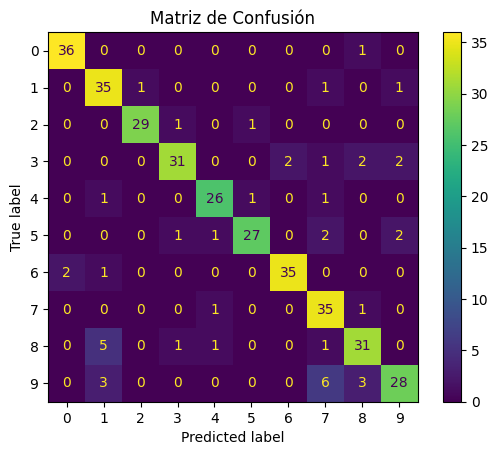

In [55]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como podemos observar, con este dataset el modelo entrena bien, obteniendo un accuracy del *86%*